In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from PIL import Image
from io import BytesIO

In [2]:
data = pd.read_csv('SHP2_test_descriptors_150.csv')
data

SMILES  MaxEStateIndex  \
0                O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)O       11.762075   
1               O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OC       11.891220   
2              O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OCC       11.960761   
3           O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OC(C)C       12.025094   
4                O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)N       11.802891   
..                                                 ...             ...   
145  O=C(NC1=CC=CC=C1[N+]([O-])=O)CCN(C(C)=NC2=C3C4...       12.993000   
146  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCC(NC...       12.357815   
147  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CC(NC5...       12.847668   
148  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCC(NC...       12.712730   
149  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCCC(N...       12.621895   

     MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  \
0         -1.324292          11.762075           0.104630  0.559777  248.190   
1         -0.890229          11.891220           0.044269  0.524898  262.217   
2         -0.885233          11.960761           0.026352  0.566824  276.244   
3         -0.887040          12.025094           0.029269  0.576007  290.271   
4         -0.897315          11.802891           0.078991  0.543863  247.206   
..              ...                ...                ...       ...      ...   
145       -0.542407          12.993000           0.020148  0.524557  398.444   
146       -1.223568          12.357815           0.143555  0.313800  481.512   
147       -1.238342          12.847668           0.069408  0.233485  543.583   
148       -1.227003          12.712730           0.156276  0.204736  557.610   
149       -1.218025          12.621895           0.088681  0.179894  571.637   

     HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  ...  fr_sulfone  \
0           240.126  248.032088                   92  ...           0   
1           252.137  262.047738                   98  ...           0   
2           264.148  276.063388                  104  ...           0   
3           276.159  290.079038                  110  ...           0   
4           238.134  247.048072                   92  ...           0   
..              ...         ...                  ...  ...         ...   
145         380.300  398.104876                  144  ...           0   
146         458.328  481.175004                  180  ...           0   
147         518.383  543.190654                  202  ...           0   
148         530.394  557.206304                  208  ...           0   
149         542.405  571.221954                  214  ...           0   

     fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                    0             0            0            0             0   
1                    0             0            0            0             0   
2                    0             0            0            0             0   
3                    0             0            0            0             0   
4                    0             0            0            0             0   
..                 ...           ...          ...          ...           ...   
145                  0             0            0            0             1   
146                  0             0            0            0             0   
147                  0             0            0            0             0   
148                  0             0            0            0             0   
149                  0             0            0            0             0   

     fr_unbrch_alkane  fr_urea  IC50(microM)  TARGET  
0                   0        0         0.097       1  
1                   0        0         0.161       1  
2                   0        0         0.985       1  
3                   0        0          4.87       0  
4                   0        0          4.11       0  
..                ...      ...

In [3]:
final_features = ['MaxPartialCharge', 'FpDensityMorgan2', 'BCUT2D_CHGLO', 'BCUT2D_MRHI',
       'PEOE_VSA12', 'PEOE_VSA6', 'SMR_VSA3', 'SlogP_VSA3', 'SlogP_VSA8',
       'EState_VSA6', 'NumHAcceptors', 'NumSaturatedCarbocycles',
       'fr_bicyclic', 'TARGET']

In [4]:
test_data = data[final_features]
test_data

MaxPartialCharge  FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  \
0            0.335343          1.666667     -1.988112     5.961393   
1            0.337506          1.789474     -1.993067     5.968264   
2            0.337772          1.850000     -2.002685     5.968802   
3            0.338038          1.761905     -2.062196     5.969423   
4            0.248358          1.722222     -1.988933     5.984624   
..                ...               ...           ...          ...   
145          0.292242          2.142857     -2.102211     7.184306   
146          0.338995          1.694444     -2.066425     6.071176   
147          0.338995          1.487805     -2.071661     6.071856   
148          0.338995          1.500000     -2.071839     6.071461   
149          0.338995          1.511628     -2.071673     6.071368   

     PEOE_VSA12  PEOE_VSA6   SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  \
0       5.42879   6.066367   0.000000    0.000000   10.772448     0.000000   
1       5.42879   6.066367   0.000000    4.736863   10.772448     0.000000   
2       5.42879   6.066367   0.000000    4.736863   10.772448     6.923737   
3       5.42879   6.066367   0.000000    4.736863   10.772448    13.847474   
4      11.33597   6.066367   0.000000    0.000000   10.772448     0.000000   
..          ...        ...        ...         ...         ...          ...   
145     5.90718  12.132734   9.551078   24.180937   10.216621    24.326890   
146     5.90718  53.744322  19.560969   18.386966   33.417684    10.878647   
147     5.90718  78.009790  19.560969   18.386966   44.544587     6.196844   
148     5.90718  78.009790  19.560969   18.386966   44.544587    10.878647   
149     5.90718  78.009790  19.560969   18.386966   44.544587    10.878647   

     NumHAcceptors  NumSaturatedCarbocycles  fr_bicyclic  TARGET  
0                5                        0            1       1  
1                6                        0            1       1  
2                6                        0            1       1  
3                6                        0            1       0  
4                5                        0            1       0  
..             ...                      ...          ...     ...  
145              7                        0            3       0  
146              7                        0            1       0  
147              7                        0            1       0  
148              7                        0            1       0  
149              7                        0            1       0  

[150 rows x 14 columns]

In [5]:
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [6]:
X_test

MaxPartialCharge  FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  \
0            0.335343          1.666667     -1.988112     5.961393   
1            0.337506          1.789474     -1.993067     5.968264   
2            0.337772          1.850000     -2.002685     5.968802   
3            0.338038          1.761905     -2.062196     5.969423   
4            0.248358          1.722222     -1.988933     5.984624   
..                ...               ...           ...          ...   
145          0.292242          2.142857     -2.102211     7.184306   
146          0.338995          1.694444     -2.066425     6.071176   
147          0.338995          1.487805     -2.071661     6.071856   
148          0.338995          1.500000     -2.071839     6.071461   
149          0.338995          1.511628     -2.071673     6.071368   

     PEOE_VSA12  PEOE_VSA6   SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  \
0       5.42879   6.066367   0.000000    0.000000   10.772448     0.000000   
1       5.42879   6.066367   0.000000    4.736863   10.772448     0.000000   
2       5.42879   6.066367   0.000000    4.736863   10.772448     6.923737   
3       5.42879   6.066367   0.000000    4.736863   10.772448    13.847474   
4      11.33597   6.066367   0.000000    0.000000   10.772448     0.000000   
..          ...        ...        ...         ...         ...          ...   
145     5.90718  12.132734   9.551078   24.180937   10.216621    24.326890   
146     5.90718  53.744322  19.560969   18.386966   33.417684    10.878647   
147     5.90718  78.009790  19.560969   18.386966   44.544587     6.196844   
148     5.90718  78.009790  19.560969   18.386966   44.544587    10.878647   
149     5.90718  78.009790  19.560969   18.386966   44.544587    10.878647   

     NumHAcceptors  NumSaturatedCarbocycles  fr_bicyclic  
0                5                        0            1  
1                6                        0            1  
2                6                        0            1  
3                6                        0            1  
4                5                        0            1  
..             ...                      ...          ...  
145              7                        0            3  
146              7                        0            1  
147              7                        0            1  
148              7                        0            1  
149              7                        0            1  

[150 rows x 13 columns]

In [7]:
model = joblib.load('XGB_Final.pkl')

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
y_test = y_test.values
y_test

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[115,   2],
       [  2,  31]], dtype=int64)

In [12]:
displ = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))

In [13]:
labels = ["Weak Inhibitors", "Strong Inhibitors"]

In [14]:
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

In [15]:
df_cm

Weak Inhibitors  Strong Inhibitors
Weak Inhibitors                115                  2
Strong Inhibitors                2                 31

In [16]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Weak Inhibitors to Strong Inhibitors
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Weak Inhibitors    2 non-null      int64
 1   Strong Inhibitors  2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


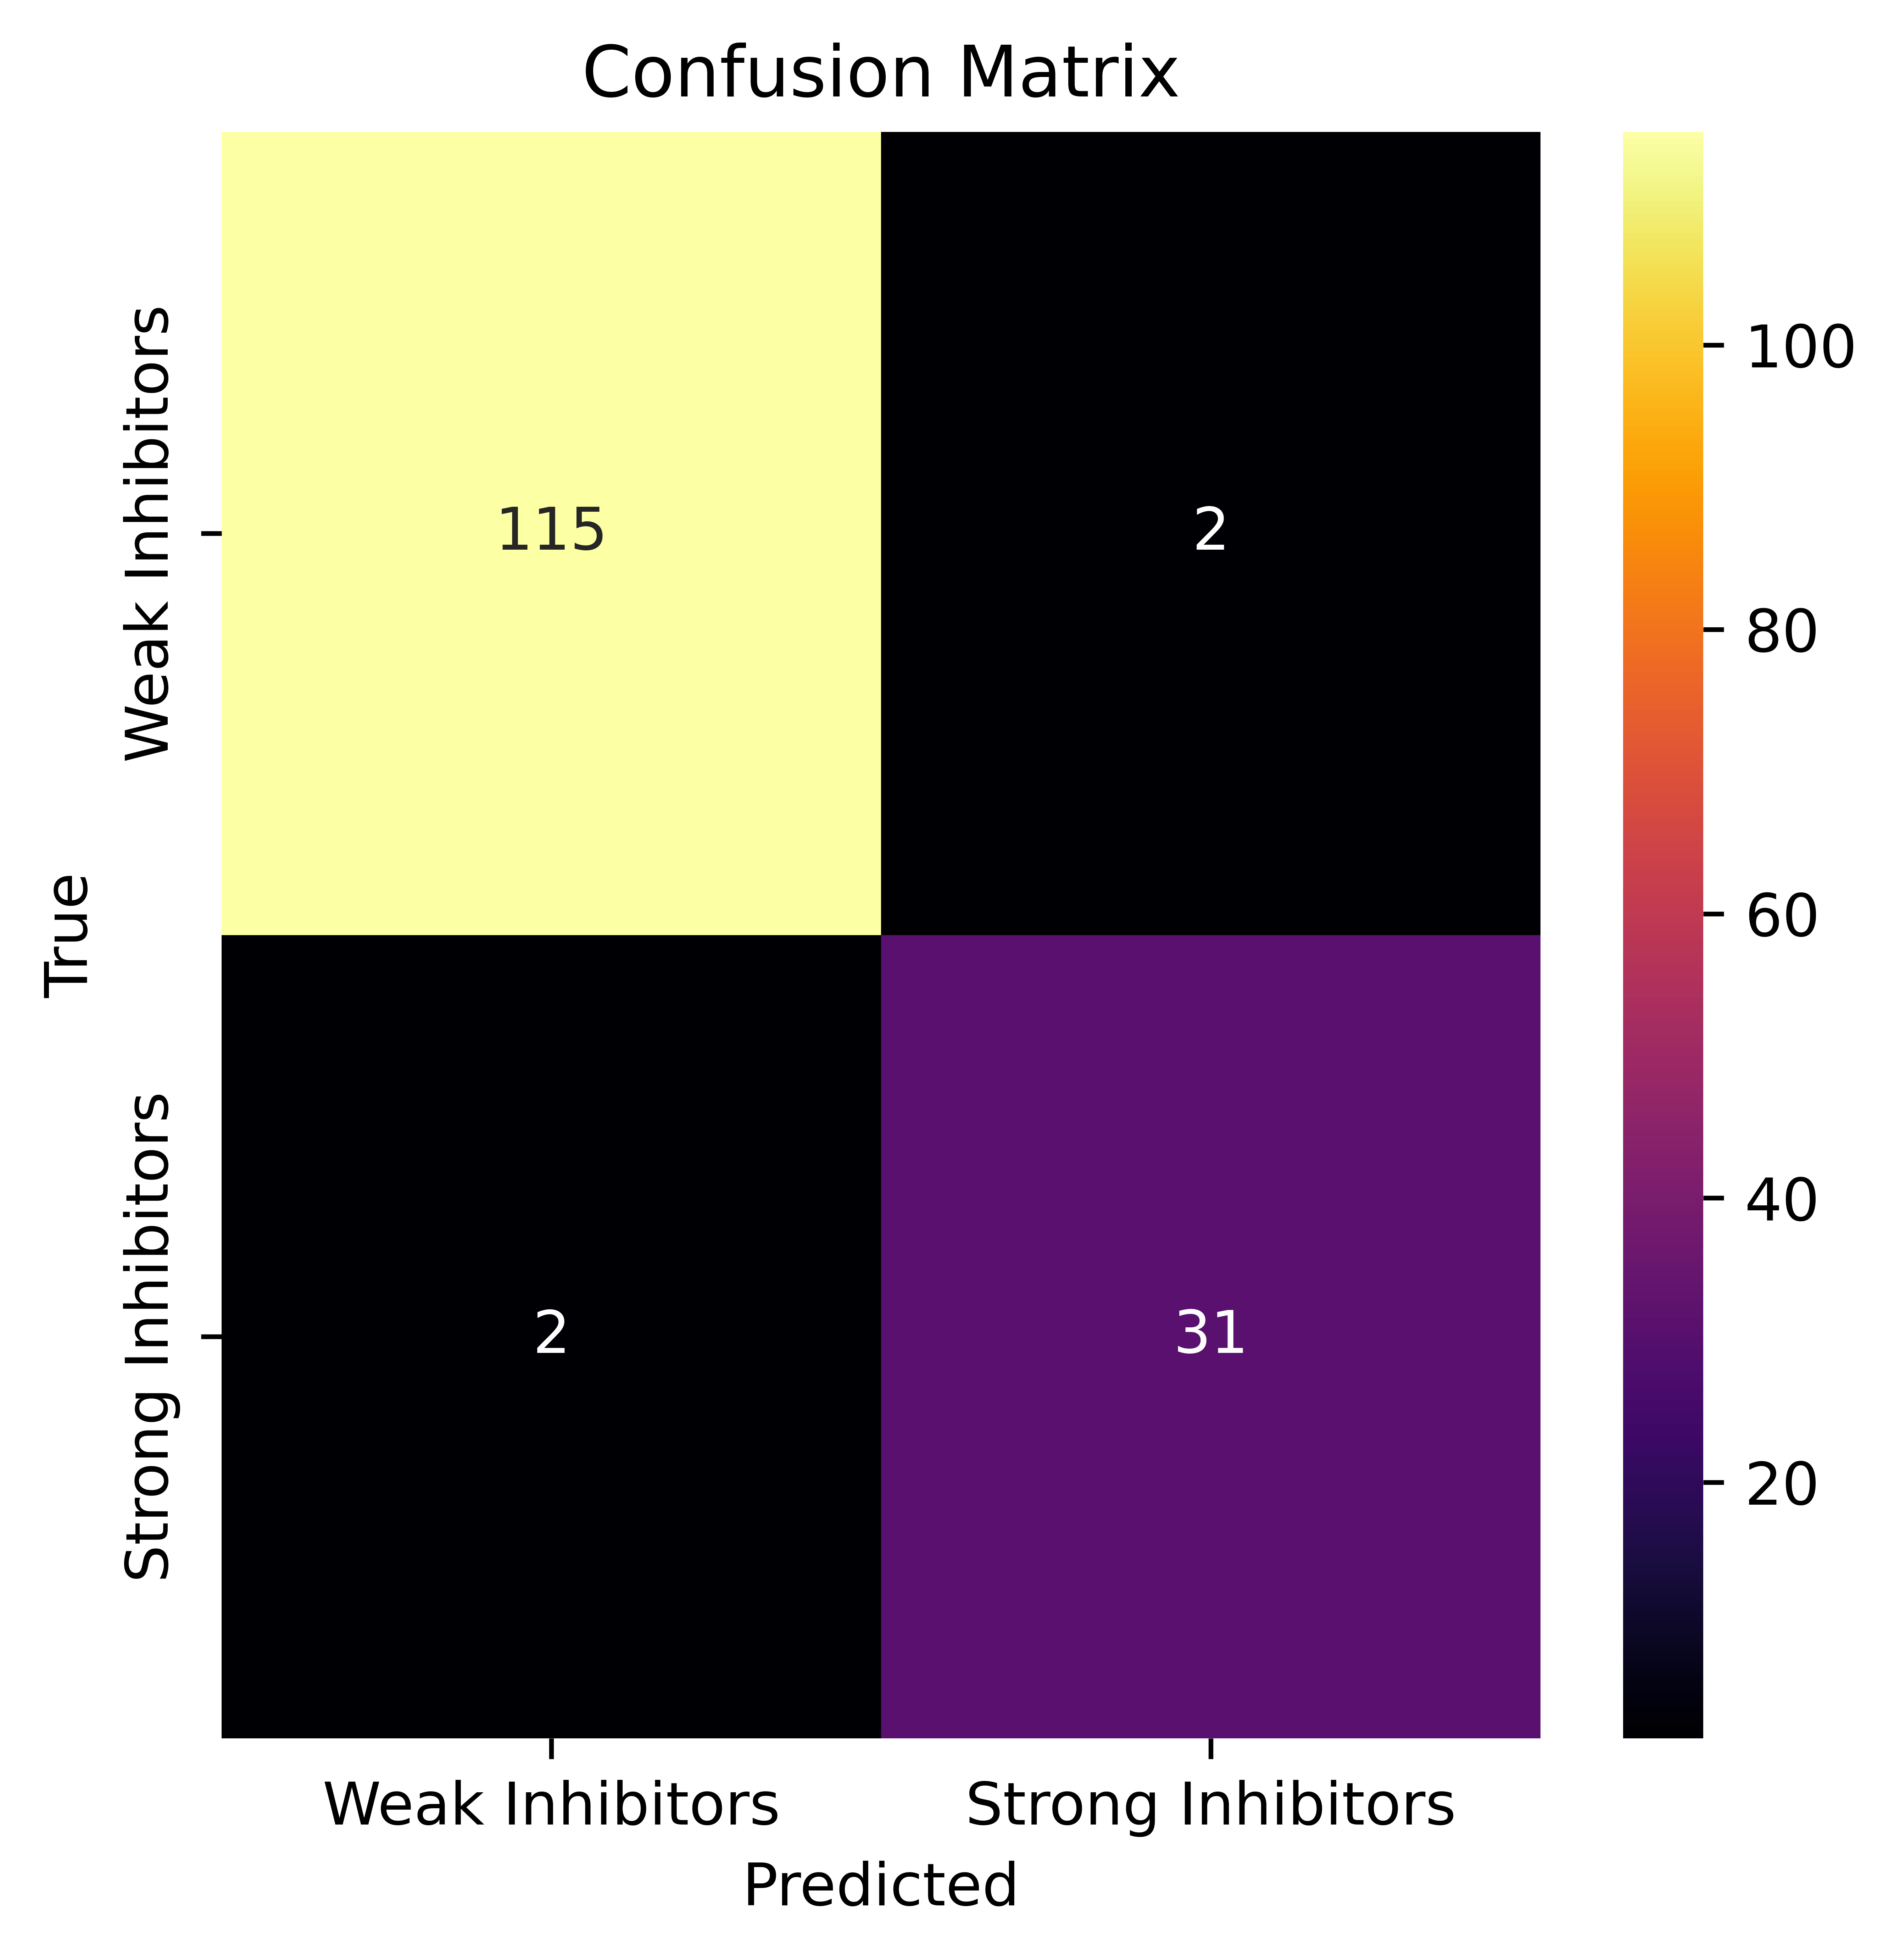

In [17]:
plt.figure(figsize=(5,5), dpi=1200)
sns.heatmap(df_cm, annot=True, cmap='inferno', fmt='g')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig('.\images\confusion_matrix.png')

In [18]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       117
           1       0.94      0.94      0.94        33

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



In [19]:
metrics.roc_auc_score(y_test, y_pred)

0.9611499611499612

In [20]:
metrics.cohen_kappa_score(y_test, y_pred)

0.9222999222999223

In [21]:
metrics.matthews_corrcoef(y_test, y_pred)

0.9222999222999223

In [22]:
error = pd.DataFrame(columns=['SMILES','True','Prediction'])
error

Empty DataFrame
Columns: [SMILES, True, Prediction]
Index: []

In [23]:
error['SMILES'] = data['SMILES'].values
error['True'] = y_test
error['Prediction'] = y_pred

In [24]:
error

SMILES  True  Prediction
0                O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)O     1           1
1               O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OC     1           1
2              O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OCC     1           1
3           O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)OC(C)C     0           0
4                O=C(C(C=C1O)=CC2=CC=C(O)C(O)=C2C1=O)N     0           0
..                                                 ...   ...         ...
145  O=C(NC1=CC=CC=C1[N+]([O-])=O)CCN(C(C)=NC2=C3C4...     0           0
146  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCC(NC...     0           0
147  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CC(NC5...     0           0
148  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCC(NC...     0           0
149  O=C(C1=CC2=C(N(C)C(C3=CC=CC=C3)=C2C4=CN(CCCC(N...     0           0

[150 rows x 3 columns]

In [25]:
error[error['True'] != error['Prediction']]

SMILES  True  Prediction
21   NC1=NC(N2CCC(C)(N)CC2)=NC=C1C3=CC=CC(Cl)=C3Cl     1           0
116      C1(NC2CCNCC2)=NC(C3=CC=C4C=CC=CC4=C3)=CS1     1           0
134   NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4N=C3)=CS2)CC1     0           1
135     NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4S3)=CS2)CC1     0           1

In [26]:
new_data = data[['SMILES', 'MaxPartialCharge', 'FpDensityMorgan2', 'BCUT2D_CHGLO', 'BCUT2D_MRHI',
       'PEOE_VSA12', 'PEOE_VSA6', 'SMR_VSA3', 'SlogP_VSA3', 'SlogP_VSA8',
       'EState_VSA6', 'NumHAcceptors', 'NumSaturatedCarbocycles',
       'fr_bicyclic', 'TARGET']]

In [27]:
new_data.iloc[[21,116,134,135],:]

SMILES  MaxPartialCharge  \
21   NC1=NC(N2CCC(C)(N)CC2)=NC=C1C3=CC=CC(Cl)=C3Cl          0.226790   
116      C1(NC2CCNCC2)=NC(C3=CC=C4C=CC=CC4=C3)=CS1          0.182932   
134   NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4N=C3)=CS2)CC1          0.185358   
135     NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4S3)=CS2)CC1          0.185386   

     FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  PEOE_VSA12  PEOE_VSA6  \
21           1.869565     -2.362885     6.433493    5.948339  35.334614   
116          1.863636     -2.226605     7.135724    0.000000  36.398202   
134          2.000000     -2.360565     7.136051    0.000000  18.199101   
135          2.000000     -2.360502     7.222297    0.000000  18.199101   

      SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  NumHAcceptors  \
21    9.967957         0.0   11.126903    12.263211              5   
116  10.300767         0.0   22.029828    11.336786              4   
134   9.967957         0.0   22.160304    11.336786              5   
135   4.983979         0.0   20.657219    11.336786              5   

     NumSaturatedCarbocycles  fr_bicyclic  TARGET  
21                         0            0       1  
116                        0            1       1  
134                        0            1       0  
135                        0            1       0

In [28]:
X_test_error = new_data.iloc[[21,116,134,135],1:-1]
X_test_error

MaxPartialCharge  FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  \
21           0.226790          1.869565     -2.362885     6.433493   
116          0.182932          1.863636     -2.226605     7.135724   
134          0.185358          2.000000     -2.360565     7.136051   
135          0.185386          2.000000     -2.360502     7.222297   

     PEOE_VSA12  PEOE_VSA6   SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  \
21     5.948339  35.334614   9.967957         0.0   11.126903    12.263211   
116    0.000000  36.398202  10.300767         0.0   22.029828    11.336786   
134    0.000000  18.199101   9.967957         0.0   22.160304    11.336786   
135    0.000000  18.199101   4.983979         0.0   20.657219    11.336786   

     NumHAcceptors  NumSaturatedCarbocycles  fr_bicyclic  
21               5                        0            0  
116              4                        0            1  
134              5                        0            1  
135              5                        0            1

In [29]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test_error)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [30]:
from rdkit import Chem
from rdkit.Chem import Draw

In [31]:
def draw_molecule(smile):
    m = Chem.MolFromSmiles(smile)
    return Draw.MolToImage(m)

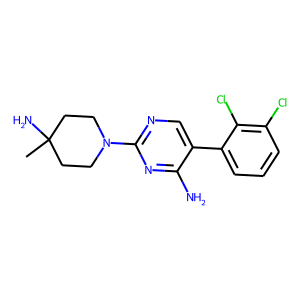

In [32]:
draw_molecule("NC1=NC(N2CCC(C)(N)CC2)=NC=C1C3=CC=CC(Cl)=C3Cl")

In [33]:
new_data.iloc[[21],:]

SMILES  MaxPartialCharge  \
21  NC1=NC(N2CCC(C)(N)CC2)=NC=C1C3=CC=CC(Cl)=C3Cl           0.22679   

    FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  PEOE_VSA12  PEOE_VSA6  \
21          1.869565     -2.362885     6.433493    5.948339  35.334614   

    SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  NumHAcceptors  \
21  9.967957         0.0   11.126903    12.263211              5   

    NumSaturatedCarbocycles  fr_bicyclic  TARGET  
21                        0            0       1

In [45]:
plt.figure(figsize=(10,10), dpi=1200)
shap.plots.waterfall(shap_values[0],show=False)
plt.savefig('.\images\Fig15_A.png',bbox_inches='tight')
plt.show()

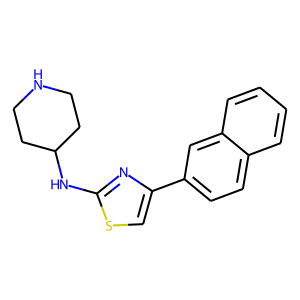

In [35]:
draw_molecule("C1(NC2CCNCC2)=NC(C3=CC=C4C=CC=CC4=C3)=CS1")

In [36]:
new_data.iloc[[116],:]

SMILES  MaxPartialCharge  \
116  C1(NC2CCNCC2)=NC(C3=CC=C4C=CC=CC4=C3)=CS1          0.182932   

     FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  PEOE_VSA12  PEOE_VSA6  \
116          1.863636     -2.226605     7.135724         0.0  36.398202   

      SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  NumHAcceptors  \
116  10.300767         0.0   22.029828    11.336786              4   

     NumSaturatedCarbocycles  fr_bicyclic  TARGET  
116                        0            1       1

In [46]:
plt.figure(figsize=(10,10), dpi=1200)
shap.plots.waterfall(shap_values[1],show=False)
plt.savefig('.\images\Fig15_B.png')

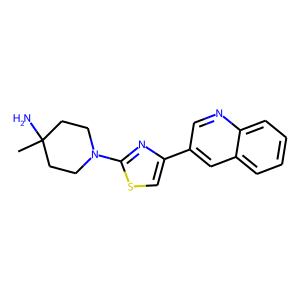

In [38]:
draw_molecule("NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4N=C3)=CS2)CC1")

In [39]:
new_data.iloc[[134],:]

SMILES  MaxPartialCharge  \
134  NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4N=C3)=CS2)CC1          0.185358   

     FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  PEOE_VSA12  PEOE_VSA6  \
134               2.0     -2.360565     7.136051         0.0  18.199101   

     SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  NumHAcceptors  \
134  9.967957         0.0   22.160304    11.336786              5   

     NumSaturatedCarbocycles  fr_bicyclic  TARGET  
134                        0            1       0

In [47]:
plt.figure(figsize=(10,10), dpi=1200)
shap.plots.waterfall(shap_values[2],show=False)
plt.savefig('.\images\Fig17_A.png')

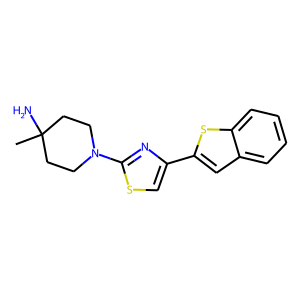

In [41]:
draw_molecule("NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4S3)=CS2)CC1")

In [42]:
new_data.iloc[[135],:]

SMILES  MaxPartialCharge  \
135  NC1(C)CCN(C2=NC(C3=CC4=CC=CC=C4S3)=CS2)CC1          0.185386   

     FpDensityMorgan2  BCUT2D_CHGLO  BCUT2D_MRHI  PEOE_VSA12  PEOE_VSA6  \
135               2.0     -2.360502     7.222297         0.0  18.199101   

     SMR_VSA3  SlogP_VSA3  SlogP_VSA8  EState_VSA6  NumHAcceptors  \
135  4.983979         0.0   20.657219    11.336786              5   

     NumSaturatedCarbocycles  fr_bicyclic  TARGET  
135                        0            1       0

In [48]:
plt.figure(figsize=(10,10), dpi=1200)
shap.plots.waterfall(shap_values[3],show=False)
plt.savefig('.\images\Fig17_B.png')